### **Import necessary libraries**

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### **Read the csv data set**

In [269]:
df_train = pd.read_csv('/content/drive/MyDrive/Dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Dataset/test.csv')

### **Sanity Check**

In [270]:
print(df_train.shape)
print(df_test.shape)

(1001, 10)
(103, 10)


In [271]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Coun

### **Searching for Null values**

In [272]:
# finding missing value
df_train.isnull().sum()
df_test.isnull().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [273]:
null_values = df_train.isnull()
null_locations = null_values.stack()
print(null_locations[null_locations])

641  Gender                        True
     Platform                      True
     Daily_Usage_Time (minutes)    True
     Posts_Per_Day                 True
     Likes_Received_Per_Day        True
     Comments_Received_Per_Day     True
     Messages_Sent_Per_Day         True
     Dominant_Emotion              True
dtype: bool


In [274]:
null_test = df_test.isnull()
null_test_locations = null_test.stack()
print(null_test_locations[null_test_locations])

Series([], dtype: bool)


### **Handling Null value**

In [275]:
# Filling the null values
# Fill with the most frequent value of the column
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Platform'] = df_train['Platform'].fillna(df_train['Platform'].mode()[0])

# Fill with the mean of the column
df_train['Daily_Usage_Time (minutes)'] = df_train['Daily_Usage_Time (minutes)'].fillna(df_train['Daily_Usage_Time (minutes)'].mean())
df_train['Posts_Per_Day'] = df_train['Posts_Per_Day'].fillna(df_train['Posts_Per_Day'].mean())
df_train['Likes_Received_Per_Day'] = df_train['Likes_Received_Per_Day'].fillna(df_train['Likes_Received_Per_Day'].mean())
df_train['Comments_Received_Per_Day'] = df_train['Comments_Received_Per_Day'].fillna(df_train['Comments_Received_Per_Day'].mean())
df_train['Messages_Sent_Per_Day'] = df_train['Messages_Sent_Per_Day'].fillna(df_train['Messages_Sent_Per_Day'].mean())
df_train['Dominant_Emotion'] = df_train['Dominant_Emotion'].fillna(df_train['Dominant_Emotion'].mode()[0])

### **Drop Duplicates**

In [276]:
# Check for duplicate
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
4


In [277]:
# Remove the duplicate data from df_test
df_test = df_test.drop_duplicates()

In [278]:
# Find garbage values
for i in df_train.select_dtypes(include='object').columns:
  print(df_train[i].value_counts())
  print('*'*50)

User_ID
1       1
672     1
659     1
660     1
661     1
       ..
340     1
341     1
342     1
343     1
1000    1
Name: count, Length: 1001, dtype: int64
**************************************************
Age
28                                                      92
27                                                      92
29                                                      90
22                                                      74
26                                                      66
25                                                      64
24                                                      64
31                                                      62
21                                                      56
33                                                      56
30                                                      48
23                                                      48
35                                                      38
32                  

### **Looking for inappropiate vaues in Age column**

In [279]:
# Train Dataset
df = pd.to_numeric(df_train['Age'], errors='coerce').isna()
non_int_values = df_train[df]['Age']

print("Rows with non-integer values:")
print(non_int_values)

Rows with non-integer values:
250          Male
251        Female
252    Non-binary
253        Female
254          Male
          ...    
784          Male
785    Non-binary
786        Female
787          Male
788    Non-binary
Name: Age, Length: 77, dtype: object


In [280]:
# Test Dataset
df1 = pd.to_numeric(df_test['Age'], errors='coerce').isna()
non_int_values = df_test[df1]['Age']

print("Rows with non-integer values:")
print(non_int_values)

Rows with non-integer values:
46    Male
Name: Age, dtype: object


### **Swapping Age and Gender data**

In [281]:
# Swap Misplaced Age and Gender Data
def is_integer(value):
    try:
        int(value)
        return True
    except ValueError:
        return False

for index, row in df_train.iterrows():
    if not is_integer(row['Age']):
        df_train.loc[index, 'Gender'], df_train.loc[index, 'Age'] = row['Age'], row['Gender']

In [282]:
# Swap Misplaced Age and Gender Data for test data
for index, row in df_test.iterrows():
    if not is_integer(row['Age']):
        df_test.loc[index, 'Gender'], df_test.loc[index, 'Age'] = row['Age'], row['Gender']

In [283]:
# If there is still non int value after swapping the age
for index, row in df_train.iterrows():
    if not is_integer(row['Age']):
      mean_age = df_train['Age'].dropna().apply(pd.to_numeric, errors='coerce').mean()
      df_train.loc[index, 'Age'] = mean_age


In [284]:
# Invalid Gender
def is_gender(value):
    if value == 'Male' or value == 'Female' or value == 'Non-binary':
        return True
    else:
        return False

for index, row in df_train.iterrows():
    if not is_gender(row['Gender']):
        df_train.loc[index, 'Gender'] = df_train['Gender'].mode()[0]

In [285]:
# Handeling invalid Age value
df_train['Age'] = pd.to_numeric(df_train['Age'], errors='coerce')
df_train.loc[df_train['Age'] == 0, 'Age'] = df_train['Age'].mean()

### **Lebel Encoding**

In [286]:
# Label encoding
le = LabelEncoder()

# Fit and transform for 'Gender', 'Platform', and 'Dominant_Emotion' columns
df_train['Gender'] = le.fit_transform(df_train['Gender'])
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

df_train['Platform'] = le.fit_transform(df_train['Platform'])
platform_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

df_train['Dominant_Emotion'] = le.fit_transform(df_train['Dominant_Emotion'])
emotion_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Output the mappings
print("Gender Label Encoding:")
print(gender_mapping)

print("\nPlatform Label Encoding:")
print(platform_mapping)

print("\nDominant Emotion Label Encoding:")
print(emotion_mapping)

Gender Label Encoding:
{'Female': 0, 'Male': 1, 'Non-binary': 2}

Platform Label Encoding:
{'Facebook': 0, 'Instagram': 1, 'LinkedIn': 2, 'Snapchat': 3, 'Telegram': 4, 'Twitter': 5, 'Whatsapp': 6}

Dominant Emotion Label Encoding:
{'Anger': 0, 'Anxiety': 1, 'Boredom': 2, 'Happiness': 3, 'Neutral': 4, 'Sadness': 5}


In [287]:
# Label encoding
le = LabelEncoder()

# Fit and transform for 'Gender', 'Platform', and 'Dominant_Emotion' columns
df_test['Gender'] = le.fit_transform(df_test['Gender'])
gender_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

df_test['Platform'] = le.fit_transform(df_test['Platform'])
platform_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

df_test['Dominant_Emotion'] = le.fit_transform(df_test['Dominant_Emotion'])
emotion_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Output the mappings
print("Gender Label Encoding:")
print(gender_mapping)

print("\nPlatform Label Encoding:")
print(platform_mapping)

print("\nDominant Emotion Label Encoding:")
print(emotion_mapping)

Gender Label Encoding:
{'Female': 0, 'Male': 1, 'Marie': 2, 'Non-binary': 3}

Platform Label Encoding:
{'Facebook': 0, 'Instagram': 1, 'LinkedIn': 2, 'Snapchat': 3, 'Telegram': 4, 'Twitter': 5, 'Whatsapp': 6}

Dominant Emotion Label Encoding:
{'Anger': 0, 'Anxiety': 1, 'Boredom': 2, 'Happiness': 3, 'Neutral': 4, 'Sadness': 5}


In [288]:
df_test['Daily_Usage_Time (minutes)'] = df_test['Daily_Usage_Time (minutes)'].astype(float)
df_test['Posts_Per_Day'] = df_test['Posts_Per_Day'].astype(float)
df_test['Likes_Received_Per_Day'] = df_test['Likes_Received_Per_Day'].astype(float)
df_test['Comments_Received_Per_Day'] = df_test['Comments_Received_Per_Day'].astype(float)
df_test['Messages_Sent_Per_Day'] = df_test['Messages_Sent_Per_Day'].astype(float)

In [289]:
df_train = df_train.drop(columns=['User_ID'])
df_test = df_test.drop(columns=['User_ID'])

### **Data Visualization**

In [290]:
print(df_train.columns)


Index(['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


In [291]:
# Bar diagram counting the contents of each column

import matplotlib.pyplot as plt
import os

save_dir = '/content/drive/MyDrive/Dataset/bar_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


for column in df_train.columns:
    try:
        plt.figure(figsize=(10, 6), dpi=600)
        if df_train[column].dtype == 'object':
            df_train[column].value_counts().plot(kind='bar')
        else:
            df_train[column].plot(kind='hist', bins=20)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

        plt.savefig(os.path.join(save_dir, f'{column}_bar_plot.png'))

        plt.show()

    except Exception as e:
        print(f"Error generating bar plot for column {column}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [292]:
# Box plot showing relation between each feature and dominant emotion

import os

save_dir = '/content/drive/MyDrive/Dataset/box_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for column in df_train.columns:
    if column != 'Dominant_Emotion':
        try:
            plt.figure(figsize=(10, 6), dpi=600)
            sns.boxplot(x='Dominant_Emotion', y=column, data=df_train)
            plt.title(f'Relationship between Dominant Emotion and {column}')
            plt.xlabel('Dominant Emotion')
            plt.ylabel(column)
            plt.xticks(rotation=45, ha='right')

            plt.savefig(os.path.join(save_dir, f'{column}_box_plot.png'))

            plt.show()

        except Exception as e:
            print(f"Error generating box plot for column {column}: {e}")


Output hidden; open in https://colab.research.google.com to view.

<Figure size 6000x3600 with 0 Axes>

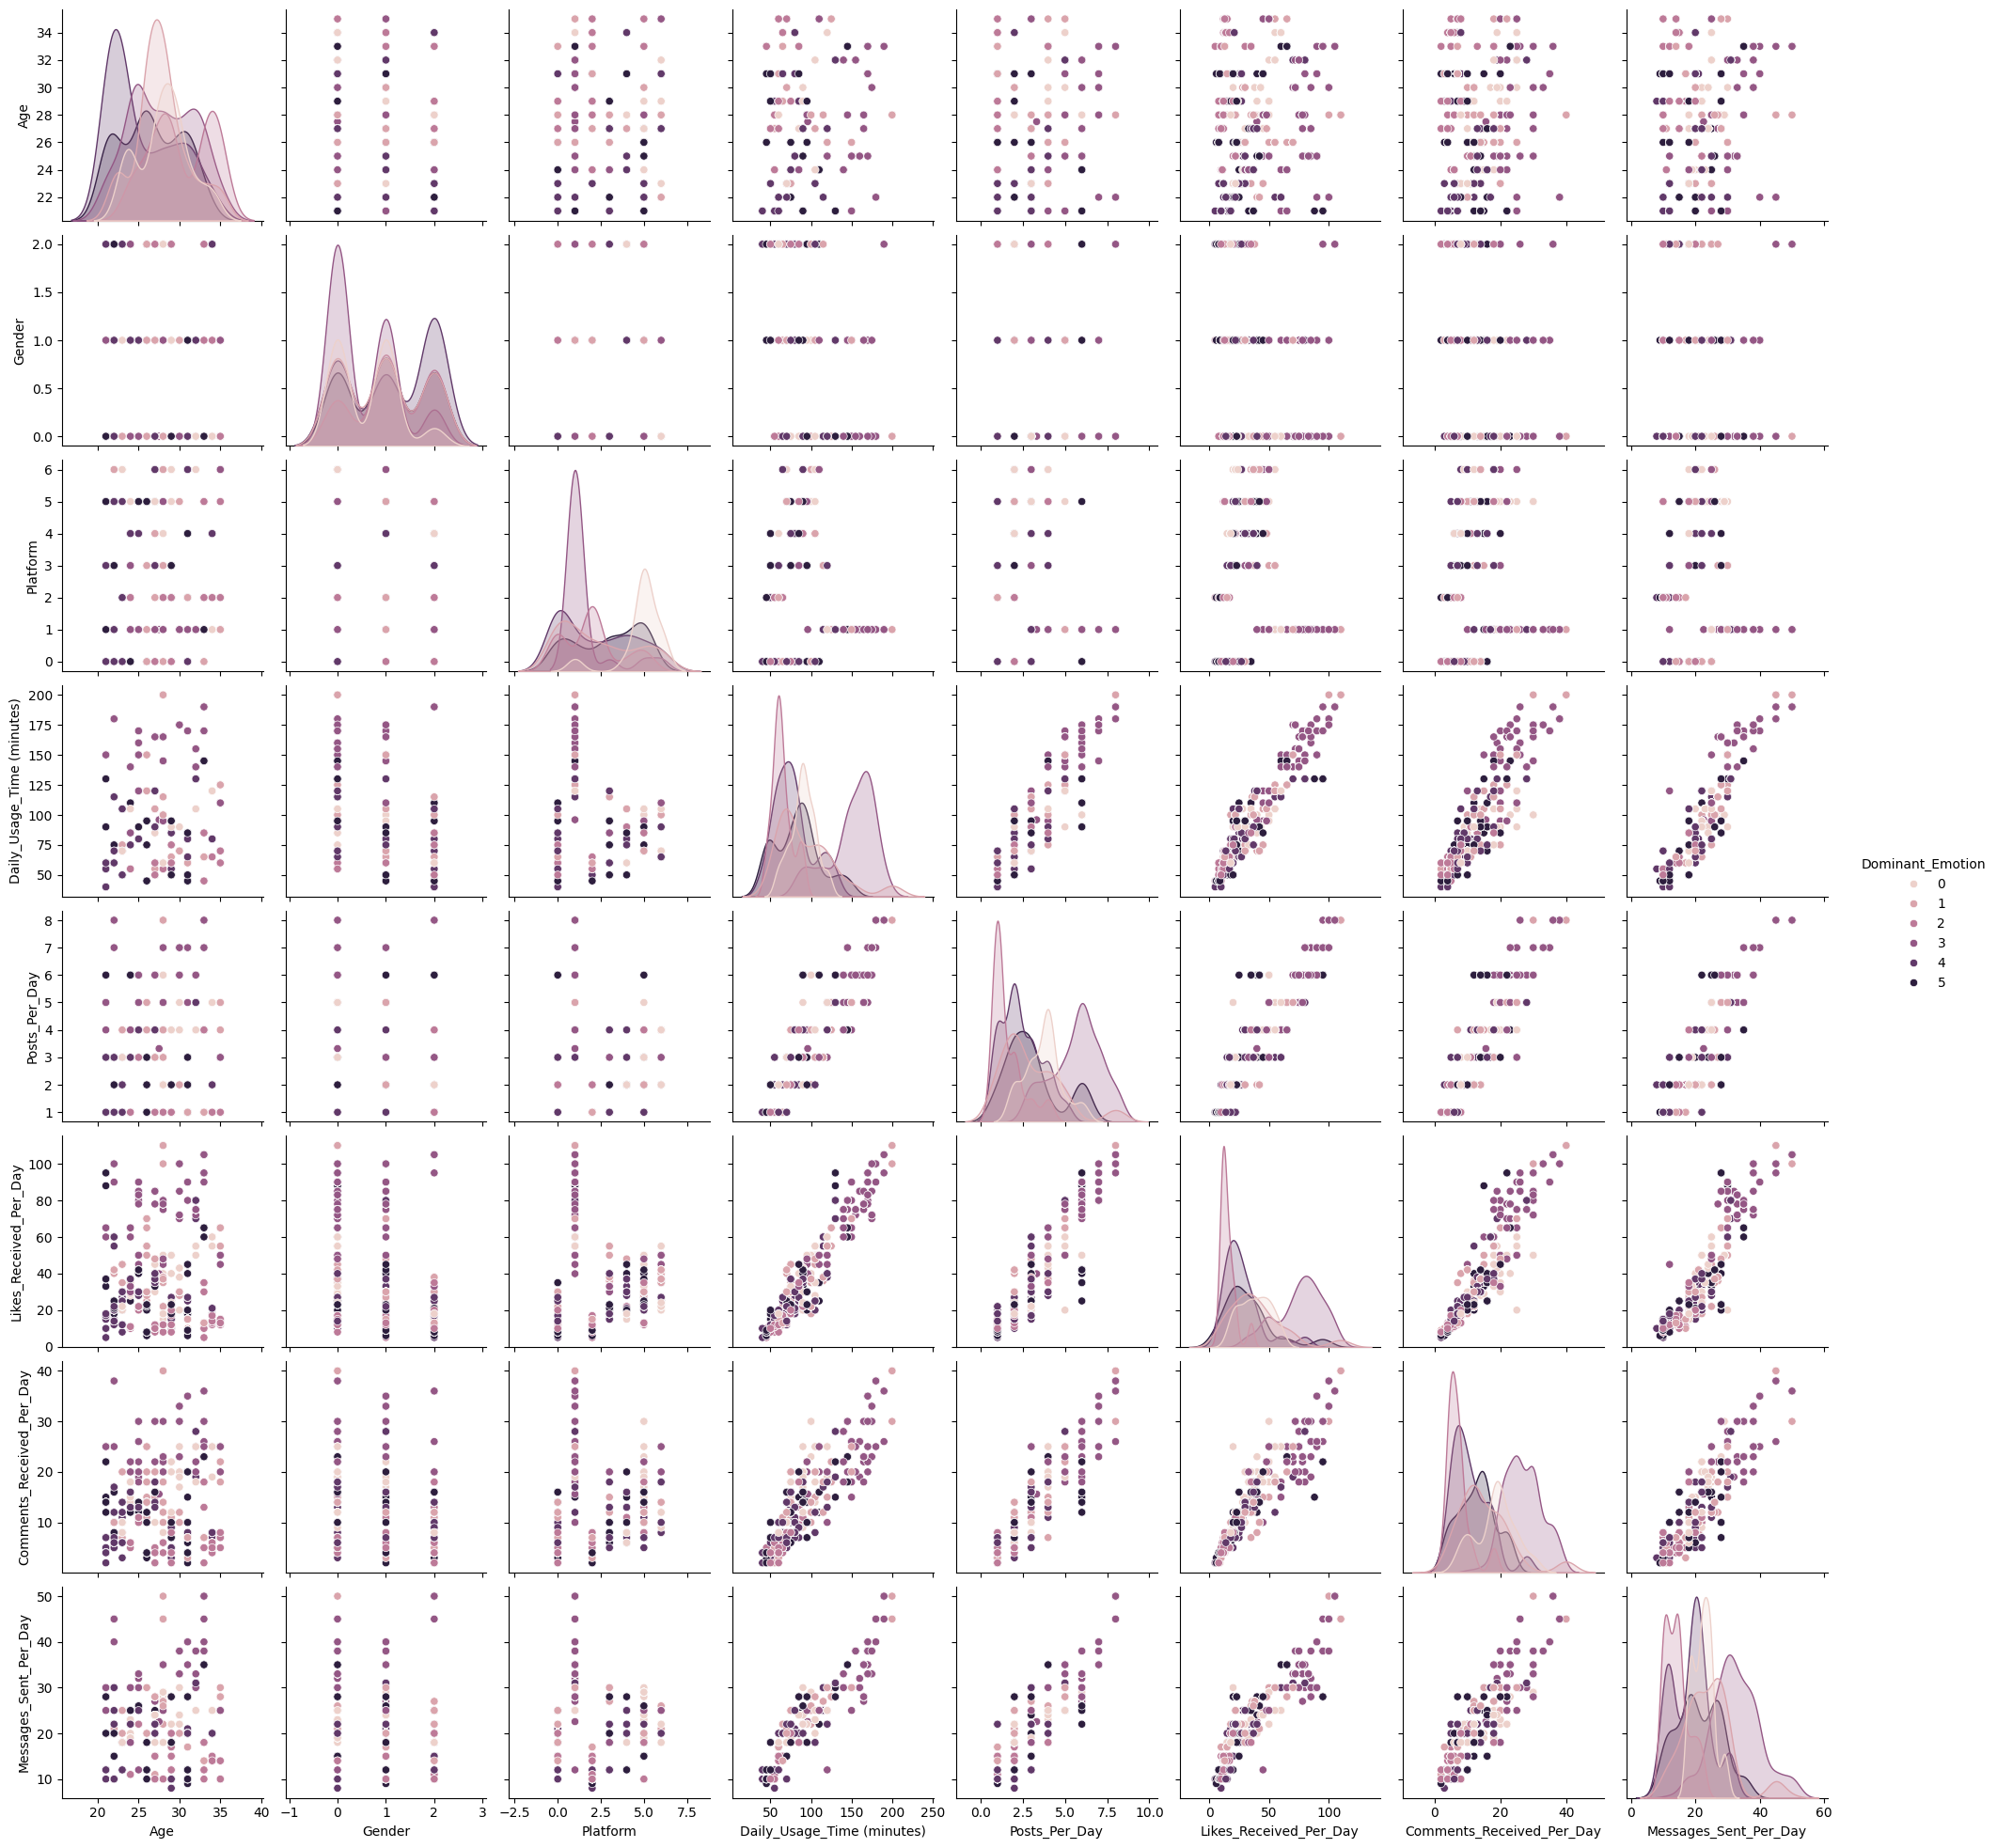

In [293]:
# Pairplots
save_dir = '/content/drive/MyDrive/Dataset/pair_plot'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.figure(figsize=(10, 6), dpi=600)
sns.pairplot(df_train, hue="Dominant_Emotion")
plt.savefig(os.path.join(save_dir, f'pair_plot.png'))
plt.show()


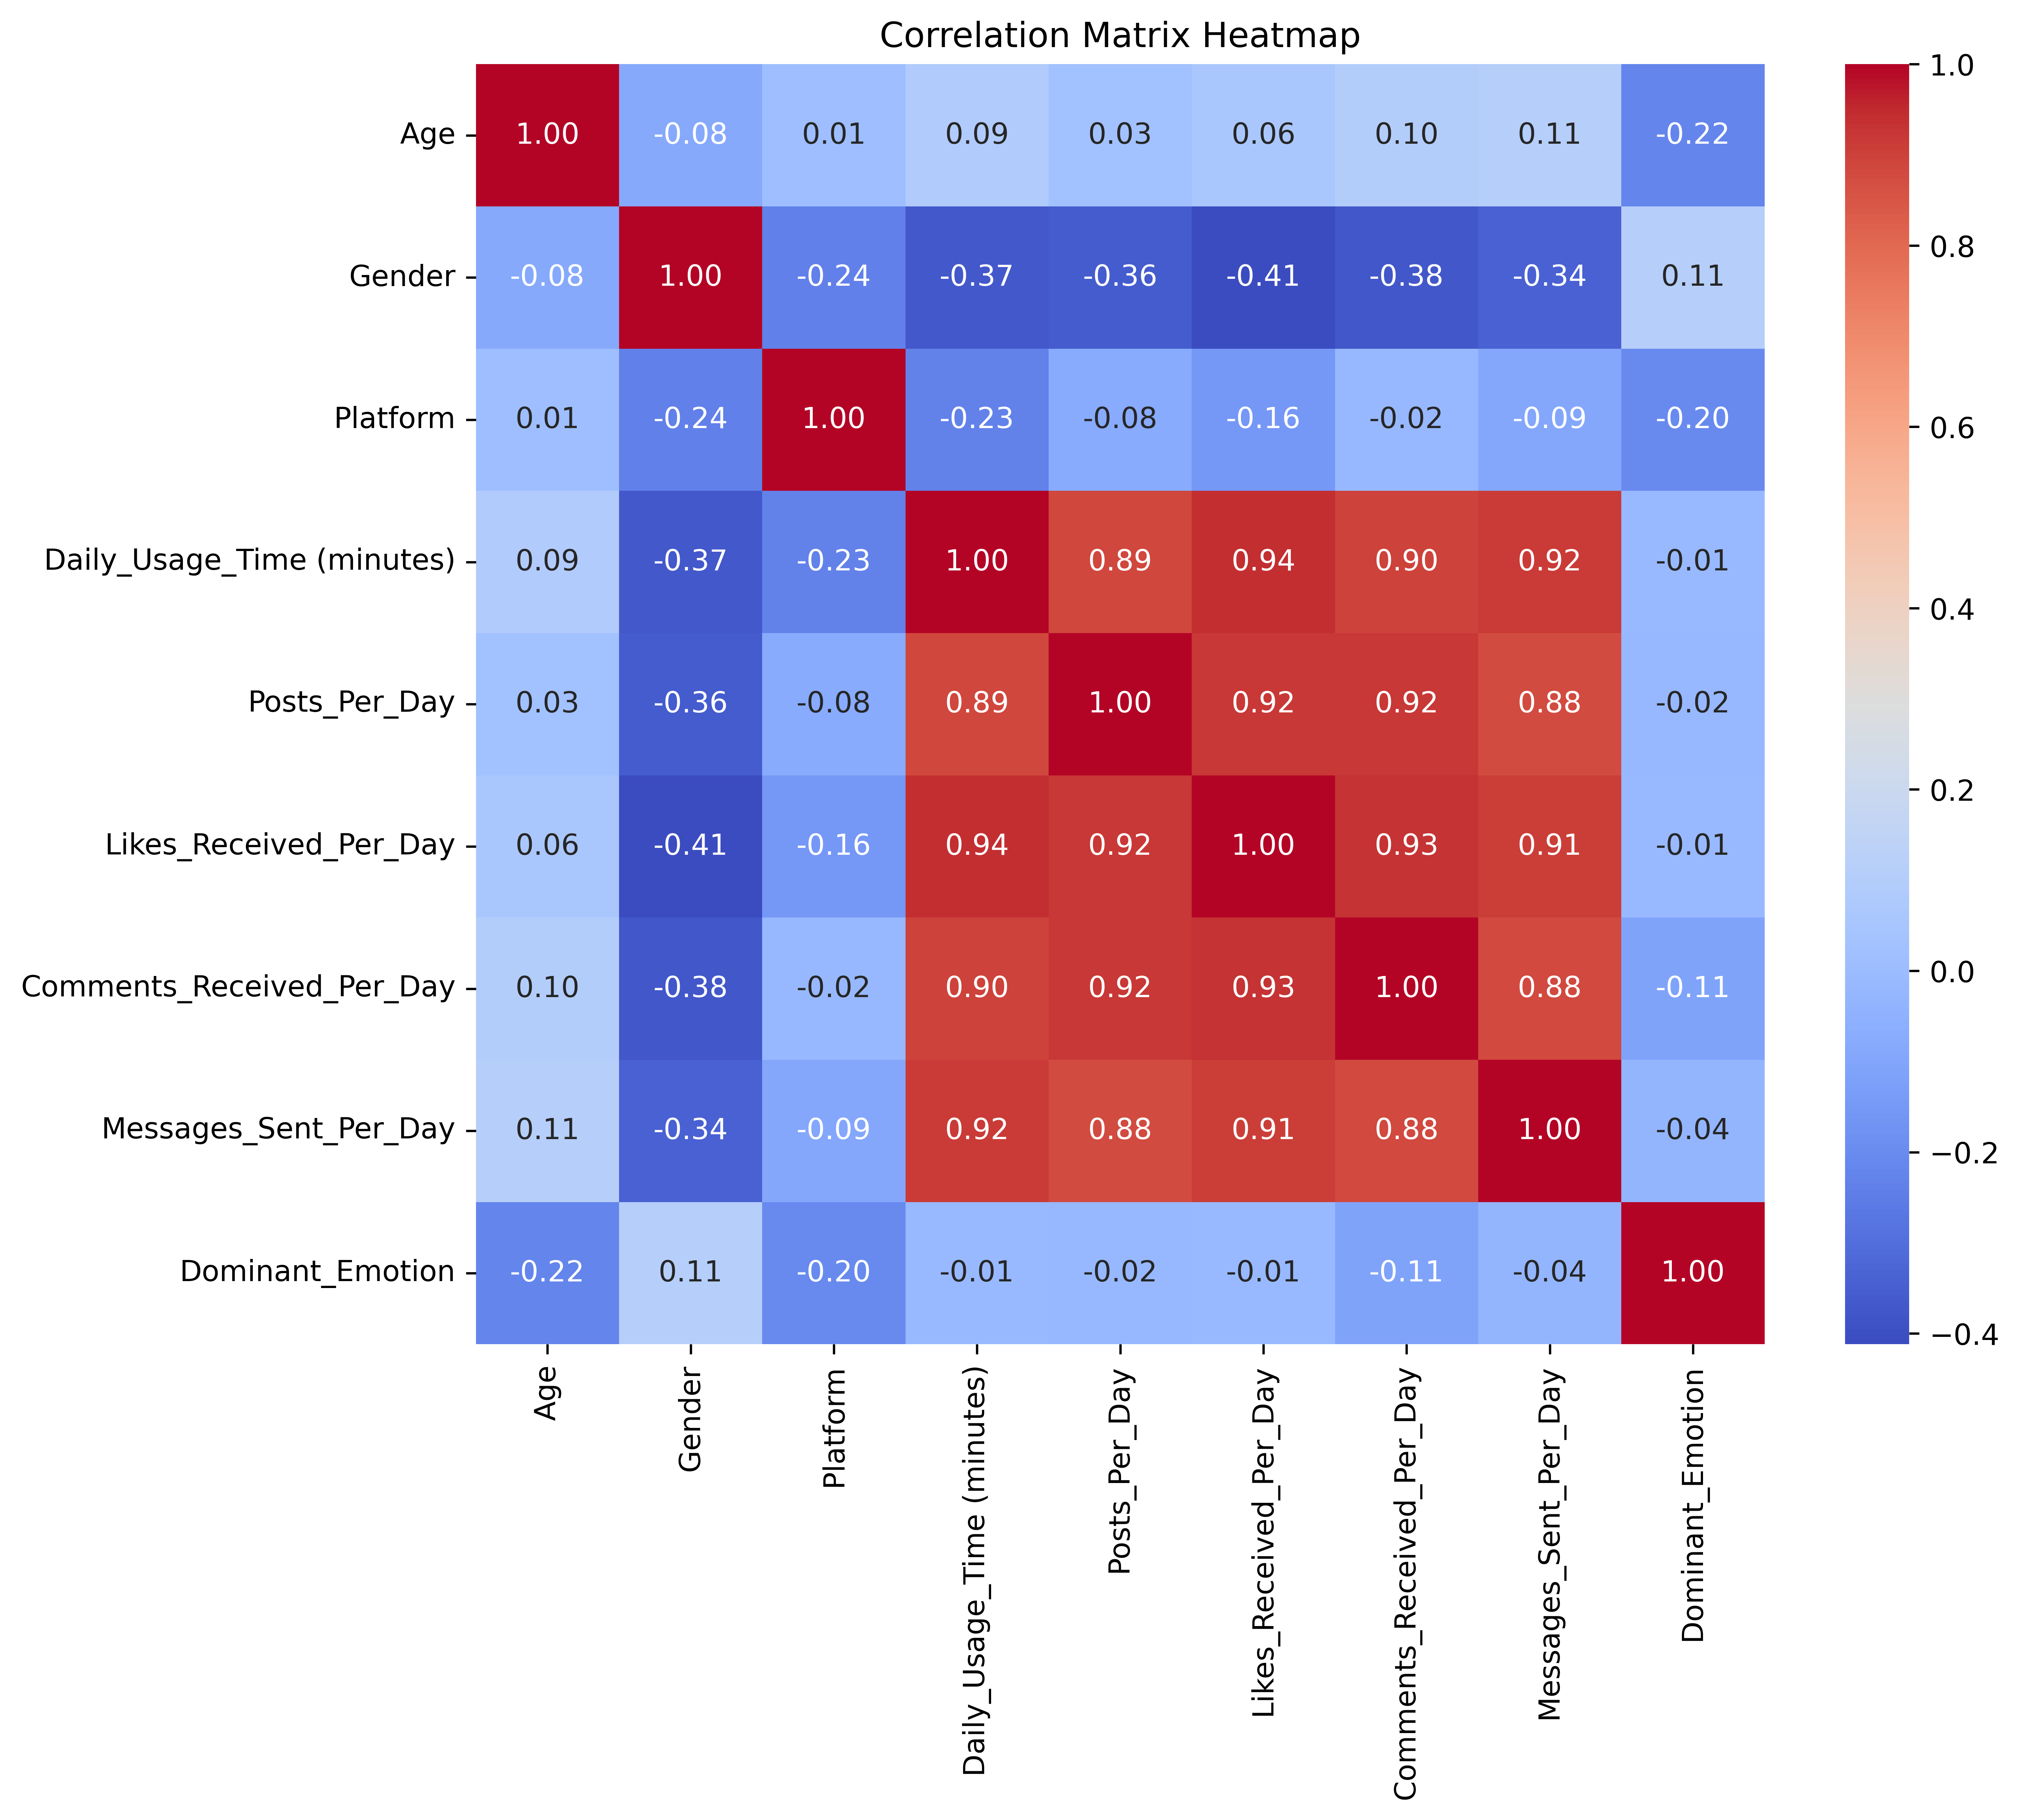

In [294]:
# Heatmap

import matplotlib.pyplot as plt
import seaborn as sns
import os

save_dir = '/content/drive/MyDrive/Dataset/heatmap'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

correlation_matrix = df_train.corr()

plt.figure(figsize=(10, 8), dpi=600)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.savefig(os.path.join(save_dir, 'correlation_heatmap.png'))

plt.show()


In [295]:
df_train['Dominant_Emotion'].value_counts()

Dominant_Emotion
3    201
4    200
1    170
5    160
2    140
0    130
Name: count, dtype: int64

In [296]:
df_train['Gender'].value_counts()

Gender
0    371
1    360
2    270
Name: count, dtype: int64

### **Separating Features and Classes**

In [297]:
# Separating Features and Classes from df_train
x = df_train.drop(['Dominant_Emotion'], axis=1)
y = df_train['Dominant_Emotion']

In [298]:
# Splitting the data set to training and validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

In [299]:
# Separating Features and Classes from df_test
x_test = df_test.drop(['Dominant_Emotion'], axis=1)
y_test = df_test['Dominant_Emotion']

In [300]:
# For training
X = np.asarray(x_train)
Y = np.asarray(y_train)
# For testing
X_test = np.asarray(x_test)
Y_test = np.asarray(y_test)
# For validation
X_val = np.asarray(x_val)
Y_val = np.asarray(y_val)

### **Import ML Models**

In [301]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

!pip install catboost
!pip install lightgbm
# Third-party libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [302]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),  # silent=True to suppress verbose output
    'MLP Classifier': MLPClassifier(max_iter=1000)
}

In [303]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
results_test = {'Model': [], 'Dataset': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}
results_val = {'Model': [], 'Dataset': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

In [304]:
# Accuracy precision recall and f1 score

for name, model in models.items():
    #print(f"Training {name}...")
    model.fit(X, Y)  # Train the model with encoded labels

    test_predictions = model.predict(X_test)  # Make predictions
    test_accuracy = accuracy_score(Y_test, test_predictions)
    test_precision = precision_score(Y_test, test_predictions, average='weighted')
    test_recall = recall_score(Y_test, test_predictions, average='weighted')
    test_f1 = f1_score(Y_test, test_predictions, average='weighted')
    results_test['Model'].append(name)
    results_test['Dataset'].append('Test')
    results_test['Accuracy'].append(test_accuracy)
    results_test['Precision'].append(test_precision)
    results_test['Recall'].append(test_recall)
    results_test['F1-Score'].append(test_f1)

    val_predictions = model.predict(X_val)  # Make predictions
    val_accuracy = accuracy_score(Y_val, val_predictions)
    val_precision = precision_score(Y_val, val_predictions, average='weighted')
    val_recall = recall_score(Y_val, val_predictions, average='weighted')
    val_f1 = f1_score(Y_val, val_predictions, average='weighted')
    results_val['Model'].append(name)
    results_val['Dataset'].append('Val')
    results_val['Accuracy'].append(val_accuracy)
    results_val['Precision'].append(val_precision)
    results_val['Recall'].append(val_recall)
    results_val['F1-Score'].append(val_f1)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 8
[LightGBM] [Info] Start training from score -2.018481
[LightGBM] [Info] Start training from score -1.771957
[LightGBM] [Info] Start training from score -2.029292
[LightGBM] [Info] Start training from score -1.638425
[LightGBM] [Info] Start training from score -1.602320
[LightGBM] [Info] Start training from score -1.771957
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

In [305]:
results_test = pd.DataFrame(results_test)
results_df_test = pd.DataFrame(results_test)
print(results_df_test)

results_val = pd.DataFrame(results_val)
results_df_val = pd.DataFrame(results_val)
print(results_df_val)

                     Model Dataset  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression    Test  0.535354   0.504799  0.535354  0.503723
1      K-Nearest Neighbors    Test  0.929293   0.931791  0.929293  0.929468
2   Support Vector Machine    Test  0.474747   0.428429  0.474747  0.416263
3            Decision Tree    Test  0.939394   0.942152  0.939394  0.939267
4            Random Forest    Test  0.979798   0.981145  0.979798  0.979849
5        Gradient Boosting    Test  0.959596   0.961344  0.959596  0.959585
6                 AdaBoost    Test  0.383838   0.163688  0.383838  0.227623
7              Extra Trees    Test  0.969697   0.971380  0.969697  0.969915
8              Naive Bayes    Test  0.393939   0.315313  0.393939  0.325710
9                      LDA    Test  0.565657   0.574221  0.565657  0.552825
10                     QDA    Test  0.636364   0.665475  0.636364  0.631917
11                 XGBoost    Test  0.949495   0.952506  0.949495  0.949874
12          

In [306]:
# Bar diagram of test and validation results

import matplotlib.pyplot as plt
import os

save_dir = '/content/drive/MyDrive/Dataset/model_comparison_plots'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

plt.figure(figsize=(16, 8), dpi=600)
width = 0.15
x = np.arange(len(results_df_test['Model']))

plt.bar(x - 1.5*width, results_df_test['Accuracy'], width, label='Accuracy')
plt.bar(x - 0.5*width, results_df_test['Precision'], width, label='Precision')
plt.bar(x + 0.5*width, results_df_test['Recall'], width, label='Recall')
plt.bar(x + 1.5*width, results_df_test['F1-Score'], width, label='F1-Score')

plt.xticks(x, results_df_test['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Test Dataset - Model Performance')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_dir, 'test_dataset_model_performance.png'))

plt.show()


# Plotting for Validation Dataset
plt.figure(figsize=(16, 8), dpi=600)
width = 0.15
x = np.arange(len(results_df_val['Model']))

plt.bar(x - 1.5*width, results_df_val['Accuracy'], width, label='Accuracy')
plt.bar(x - 0.5*width, results_df_val['Precision'], width, label='Precision')
plt.bar(x + 0.5*width, results_df_val['Recall'], width, label='Recall')
plt.bar(x + 1.5*width, results_df_val['F1-Score'], width, label='F1-Score')

plt.xticks(x, results_df_val['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Validation Dataset - Model Performance')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(save_dir, 'validation_dataset_model_performance.png'))

plt.show()


Output hidden; open in https://colab.research.google.com to view.

Error calculating ROC for Support Vector Machine: This 'SVC' has no attribute 'predict_proba'


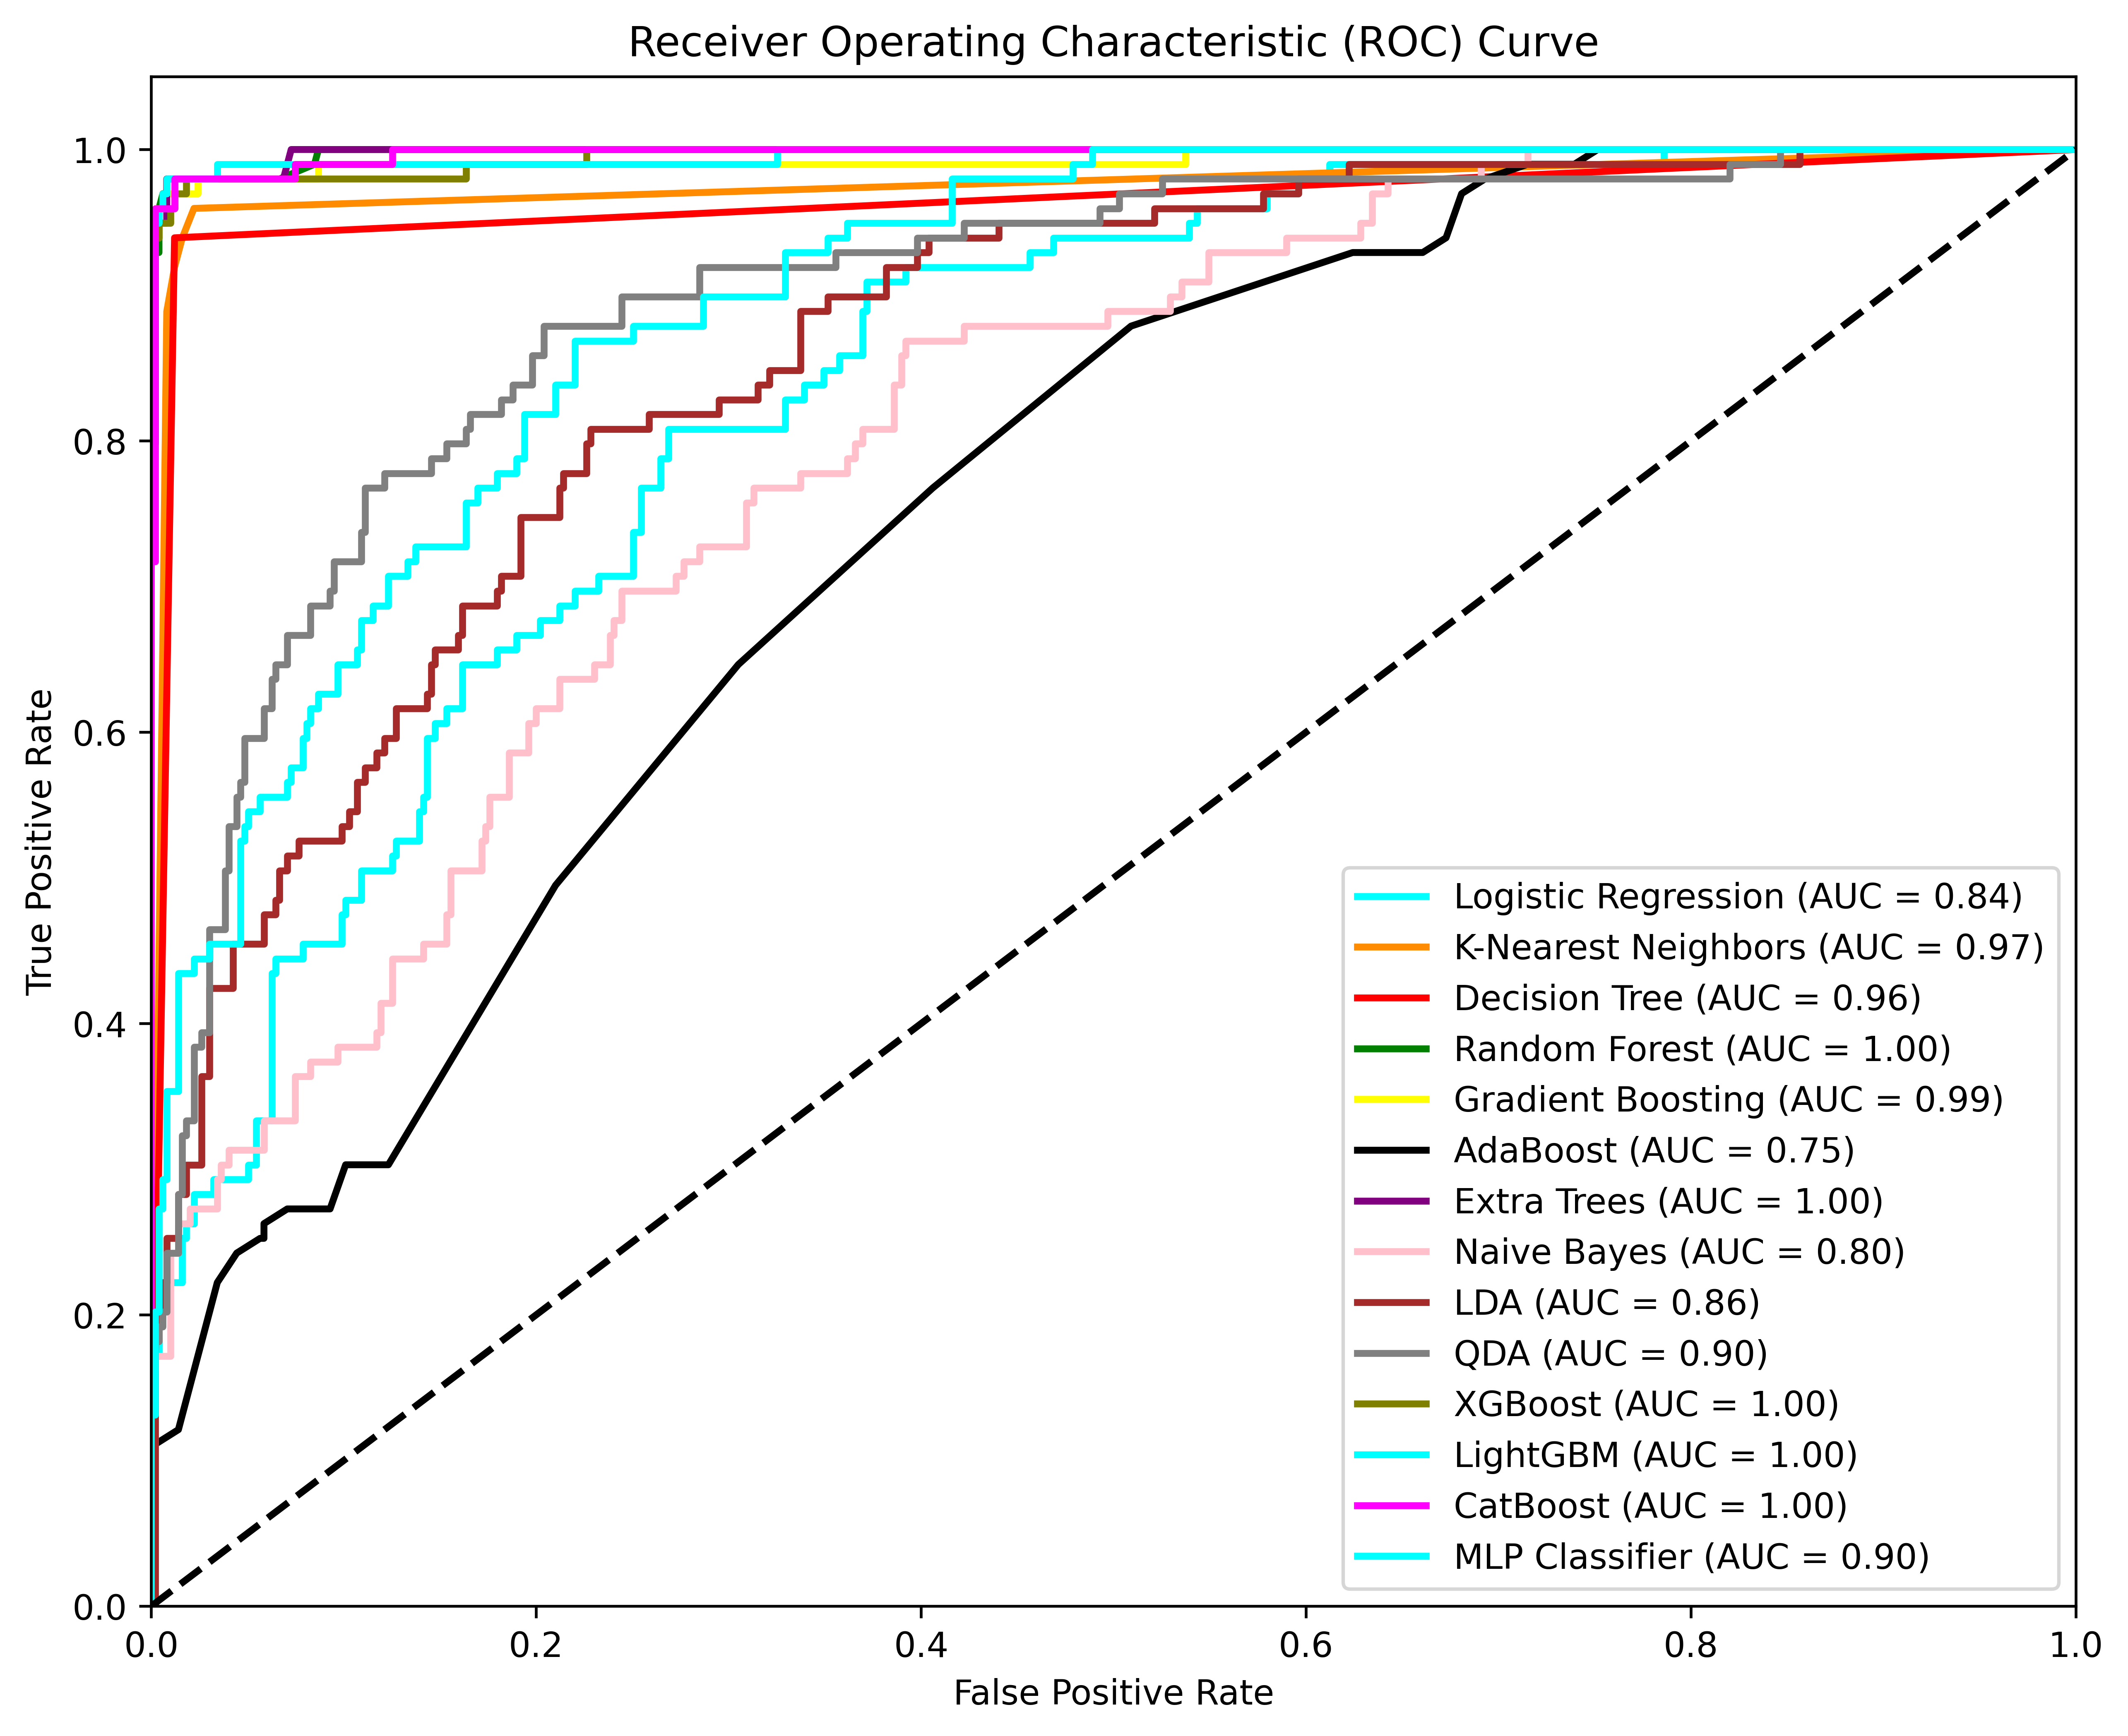

                     Model       AUC
0      Logistic Regression  0.837568
1      K-Nearest Neighbors  0.974778
2   Support Vector Machine       NaN
3            Decision Tree  0.963636
4            Random Forest  0.998000
5        Gradient Boosting  0.993327
6                 AdaBoost  0.749475
7              Extra Trees  0.998235
8              Naive Bayes  0.799980
9                      LDA  0.861688
10                     QDA  0.900153
11                 XGBoost  0.995327
12                LightGBM  0.996184
13                CatBoost  0.997245
14          MLP Classifier  0.900133


In [307]:
# AUC values and ROC plots for test results

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize

save_dir = '/content/drive/MyDrive/Dataset/roc_plots_test'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_test_bin.shape[1]

auc_scores = []
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

for name, model in models.items():
  try:
    y_score = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    auc_scores.append(roc_auc["micro"])
    fpr_dict[name] = fpr["micro"]
    tpr_dict[name] = tpr["micro"]
    roc_auc_dict[name] = roc_auc["micro"]

  except Exception as e:
      print(f"Error calculating ROC for {name}: {e}")
      auc_scores.append(None)


# Plot ROC curves for each model
plt.figure(figsize=(10, 8), dpi=600)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'black', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta'])
for i, (name, color) in enumerate(zip(models.keys(), colors)):
    if roc_auc_dict.get(name) is not None:
        plt.plot(fpr_dict[name], tpr_dict[name], color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc_dict[name]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.savefig(os.path.join(save_dir, 'roc_curve_all_models.png'))

plt.show()

auc_df = pd.DataFrame({'Model': models.keys(), 'AUC': auc_scores})
print(auc_df)


Error calculating ROC for Support Vector Machine: This 'SVC' has no attribute 'predict_proba'


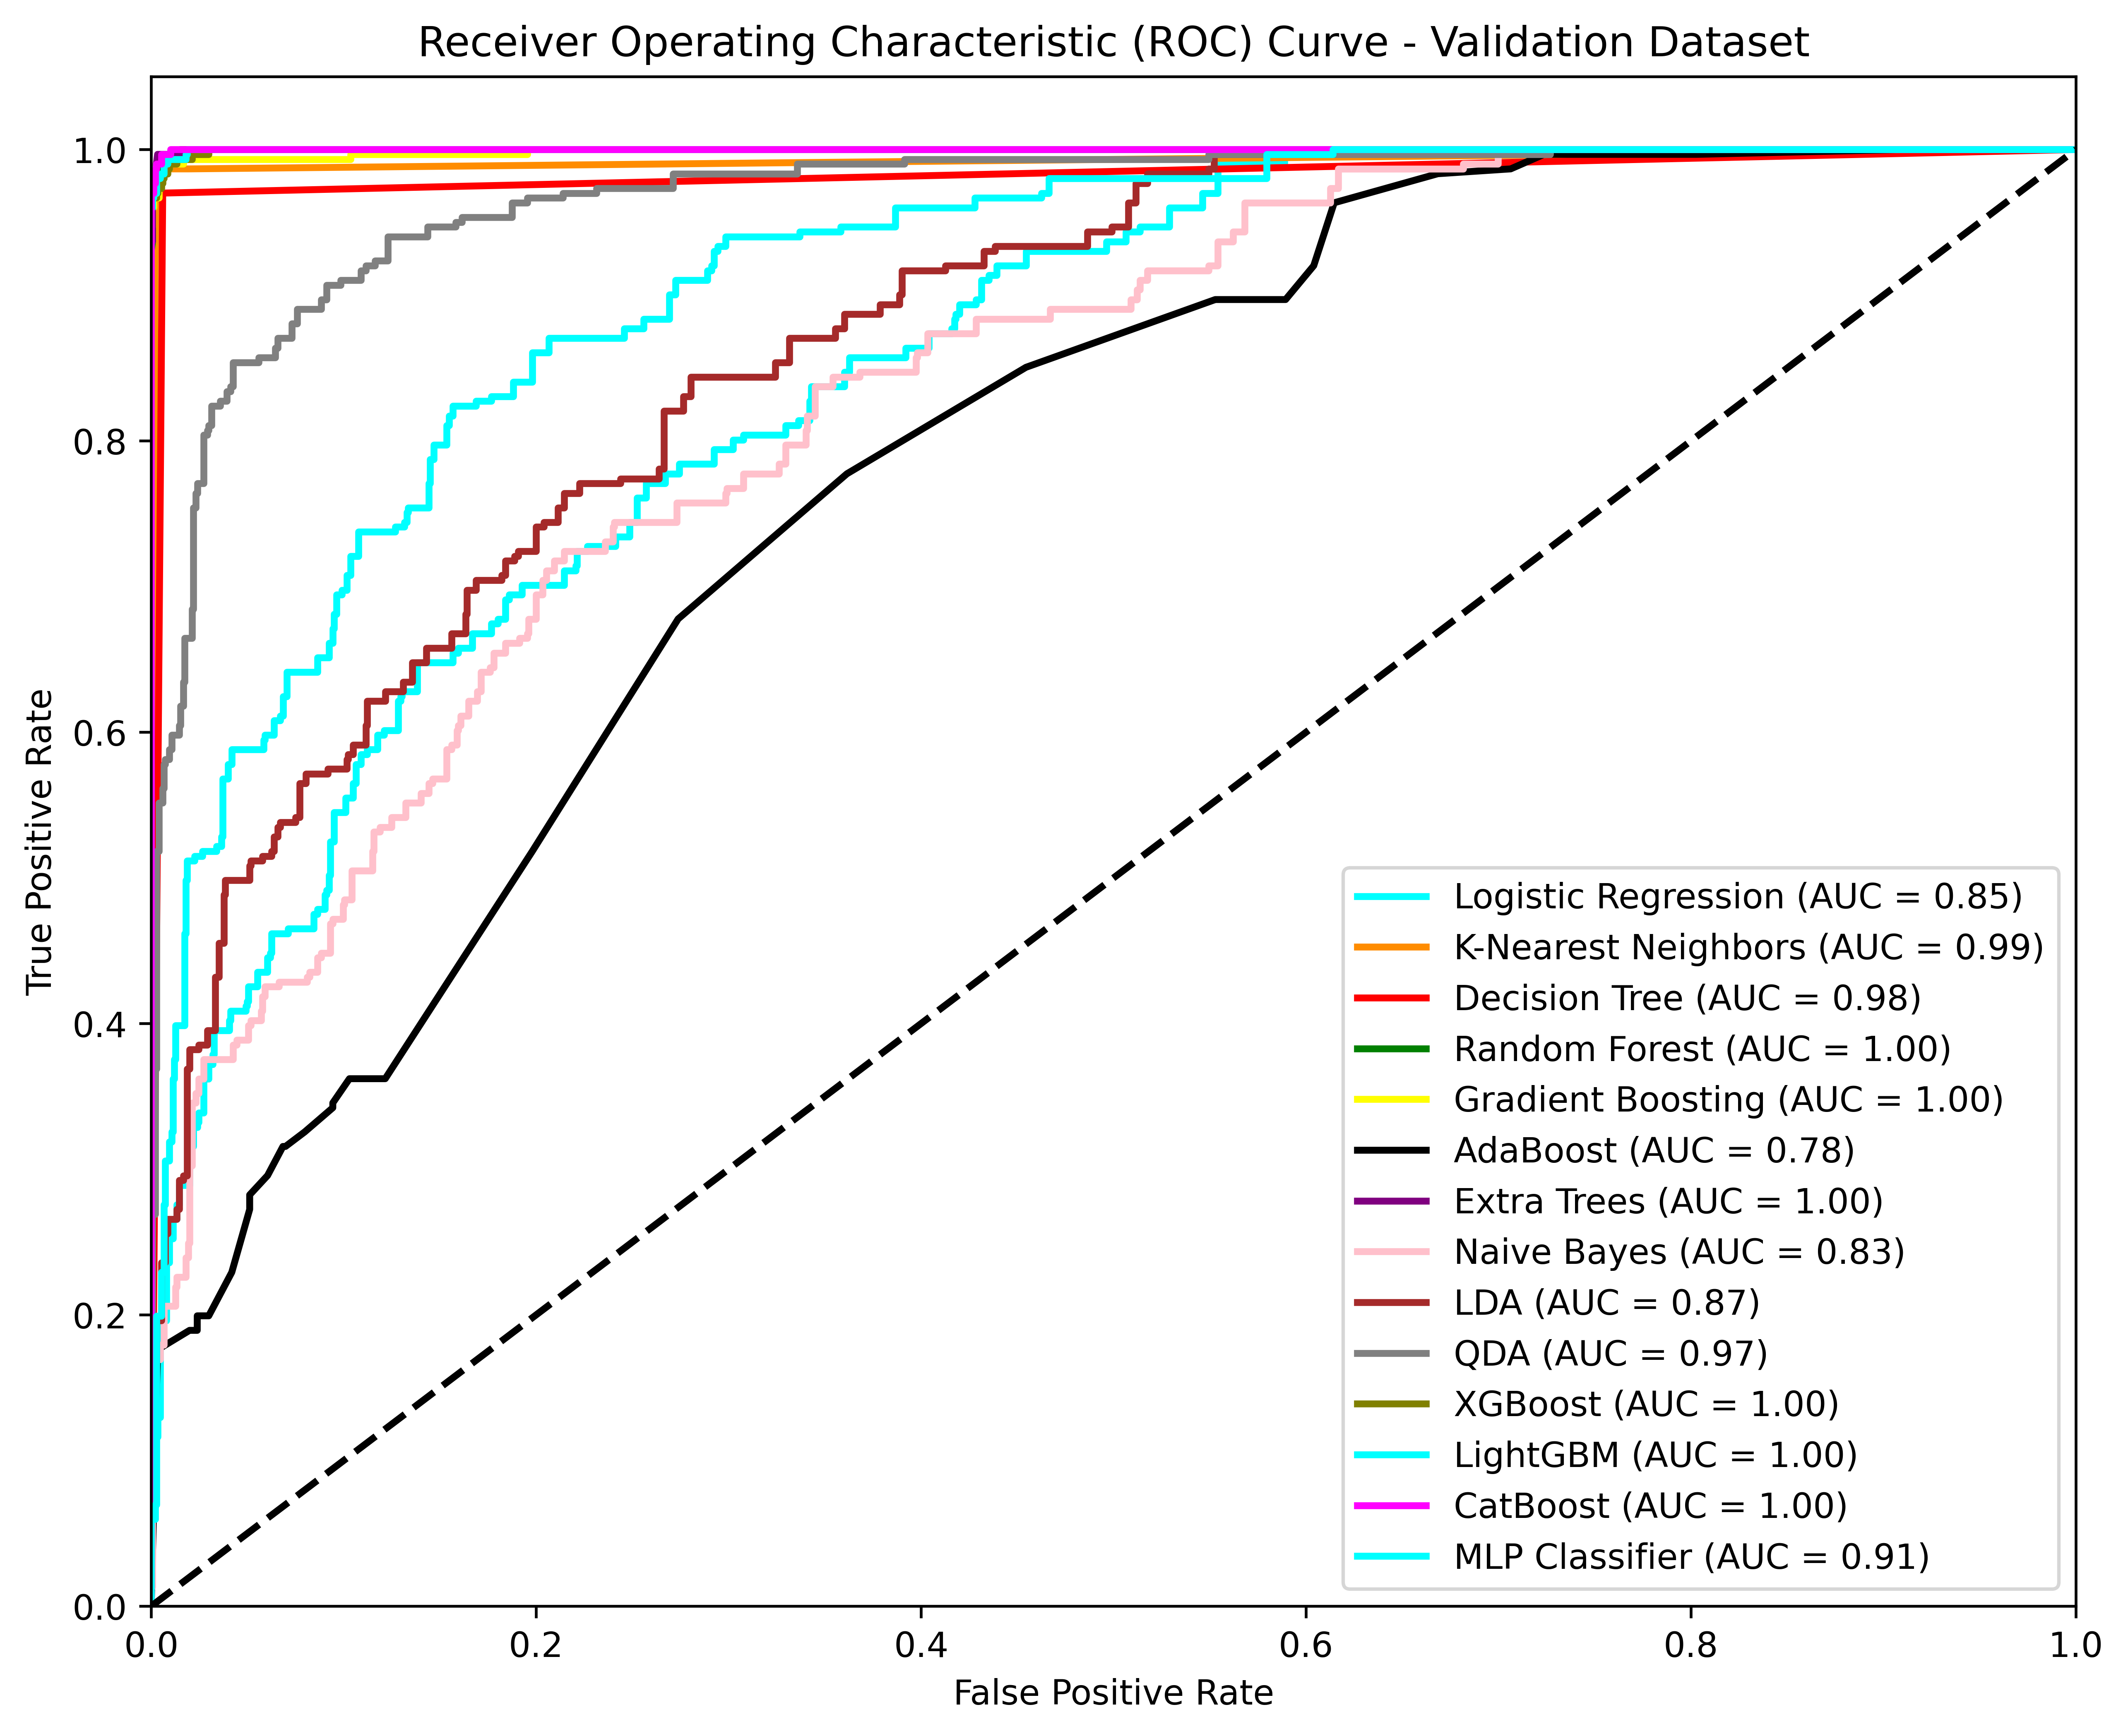

                     Model       AUC
0      Logistic Regression  0.849403
1      K-Nearest Neighbors  0.992109
2   Support Vector Machine       NaN
3            Decision Tree  0.982060
4            Random Forest  0.999832
5        Gradient Boosting  0.998801
6                 AdaBoost  0.776852
7              Extra Trees  0.999843
8              Naive Bayes  0.830488
9                      LDA  0.869463
10                     QDA  0.968245
11                 XGBoost  0.999647
12                LightGBM  0.999755
13                CatBoost  0.999894
14          MLP Classifier  0.911089


In [308]:
# AUC values for all models and Plot ROC curve for validation

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the labels for ROC curve calculation
y_val_bin = label_binarize(Y_val, classes=np.unique(Y_val))
n_classes = y_val_bin.shape[1]

# Initialize lists to store AUC values and ROC curves for each model
auc_scores = []
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Iterate through the models and calculate AUC and ROC curve
for name, model in models.items():
    try:
        # Get predicted probabilities for each class
        y_score = model.predict_proba(X_val)

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Store AUC and ROC curves for plotting
        auc_scores.append(roc_auc["micro"])
        fpr_dict[name] = fpr["micro"]
        tpr_dict[name] = tpr["micro"]
        roc_auc_dict[name] = roc_auc["micro"]

    except Exception as e:
        print(f"Error calculating ROC for {name}: {e}")
        auc_scores.append(None)

# Create a directory to store the images if it doesn't exist
save_dir = '/content/drive/MyDrive/Dataset/roc_plots_validation'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Plot ROC curves for each model
plt.figure(figsize=(10, 8), dpi=600)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'black', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta'])
for i, (name, color) in enumerate(zip(models.keys(), colors)):
    if roc_auc_dict.get(name) is not None:
        plt.plot(fpr_dict[name], tpr_dict[name], color=color, lw=2,
                 label=f'{name} (AUC = {roc_auc_dict[name]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Dataset')
plt.legend(loc="lower right")

# Save the plot to the drive
plt.savefig(os.path.join(save_dir, 'roc_curve_validation.png'))

plt.show()

# Display AUC scores in a table
auc_df = pd.DataFrame({'Model': models.keys(), 'AUC': auc_scores})
print(auc_df)


In [309]:
# Separate ROC plot for each model of test dataset

from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import os

# Assuming you have your models trained and X_test, Y_test available

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_test_bin.shape[1]

# Create a directory to store the images if it doesn't exist
save_dir = '/content/drive/MyDrive/Dataset/roc_plots_test_individual'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate through the models and generate individual ROC plots
for name, model in models.items():
    try:
        # Get predicted probabilities for each class
        y_score = model.predict_proba(X_test)

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot ROC curve for the current model
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2,
                 label=f'{name} (AUC = {roc_auc["micro"]:0.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")

        # Save the plot to the drive
        plt.savefig(os.path.join(save_dir, f'roc_curve_{name}.png'))

        plt.show()

    except Exception as e:
        print(f"Error calculating ROC for {name}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [310]:
# Separate ROC plot for each model of validation dataset
y_val_bin = label_binarize(Y_val, classes=np.unique(Y_val))
n_classes = y_val_bin.shape[1]

# Create a directory to store the images if it doesn't exist
save_dir = '/content/drive/MyDrive/Dataset/roc_plots_validation_individual'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate through the models and generate individual ROC plots
for name, model in models.items():
    try:
        # Get predicted probabilities for each class
        y_score = model.predict_proba(X_val)

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and AUC
        fpr["micro"], tpr["micro"], _ = roc_curve(y_val_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Plot ROC curve for the current model
        plt.figure(figsize=(8, 6), dpi=600)
        plt.plot(fpr["micro"], tpr["micro"], color='darkorange', lw=2,
                 label=f'{name} (AUC = {roc_auc["micro"]:0.2f})')
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name} (Validation)')
        plt.legend(loc="lower right")

        # Save the plot to the drive
        plt.savefig(os.path.join(save_dir, f'roc_curve_{name}_validation.png'))

        plt.show()

    except Exception as e:
        print(f"Error calculating ROC for {name}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [311]:
# Separate ROC plot for each classes for model of test dataset

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
import matplotlib.pyplot as plt
import os

# Assuming you have your models trained and X_test, Y_test available

# Binarize the labels for ROC curve calculation
y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = y_test_bin.shape[1]

# Create a directory to store the images if it doesn't exist
save_dir = '/content/drive/MyDrive/Dataset/roc_plots_test_individual_classes'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate through the models and generate individual ROC plots for each class
for name, model in models.items():
    try:
        # Get predicted probabilities for each class
        y_score = model.predict_proba(X_test)

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class of the current model
        plt.figure(figsize=(8, 6), dpi=600)
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'black', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Class {np.unique(Y_test)[i]} (AUC = {roc_auc[i]:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")

        # Save the plot to the drive
        plt.savefig(os.path.join(save_dir, f'roc_curve_{name}_classes.png'))

        plt.show()

    except Exception as e:
        print(f"Error calculating ROC for {name}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [312]:
# prompt: Separate ROC plot for each classes for model of validation dataset

# Assuming you have your models trained and X_val, Y_val available

# Binarize the labels for ROC curve calculation
y_val_bin = label_binarize(Y_val, classes=np.unique(Y_val))
n_classes = y_val_bin.shape[1]

# Create a directory to store the images if it doesn't exist
save_dir = '/content/drive/MyDrive/Dataset/roc_plots_validation_individual_classes'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Iterate through the models and generate individual ROC plots for each class
for name, model in models.items():
    try:
        # Get predicted probabilities for each class
        y_score = model.predict_proba(X_val)

        # Calculate ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class of the current model
        plt.figure(figsize=(8, 6), dpi=600)
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'yellow', 'black', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan', 'magenta'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label=f'Class {np.unique(Y_val)[i]} (AUC = {roc_auc[i]:0.2f})')

        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name} (Validation)')
        plt.legend(loc="lower right")

        # Save the plot to the drive
        plt.savefig(os.path.join(save_dir, f'roc_curve_{name}_classes_validation.png'))

        plt.show()

    except Exception as e:
        print(f"Error calculating ROC for {name}: {e}")


Output hidden; open in https://colab.research.google.com to view.

In [313]:
# Convert Accuracy, Precision, Recall, and F1-Score to percentage in results_df_test
results_df_test['Accuracy'] = (results_df_test['Accuracy'] * 100).round(2).astype(str) + '%'
results_df_test['Precision'] = (results_df_test['Precision'] * 100).round(2).astype(str) + '%'
results_df_test['Recall'] = (results_df_test['Recall'] * 100).round(2).astype(str) + '%'
results_df_test['F1-Score'] = (results_df_test['F1-Score'] * 100).round(2).astype(str) + '%'

# Display the table
print(results_df_test)


                     Model Dataset Accuracy Precision  Recall F1-Score
0      Logistic Regression    Test   53.54%    50.48%  53.54%   50.37%
1      K-Nearest Neighbors    Test   92.93%    93.18%  92.93%   92.95%
2   Support Vector Machine    Test   47.47%    42.84%  47.47%   41.63%
3            Decision Tree    Test   93.94%    94.22%  93.94%   93.93%
4            Random Forest    Test   97.98%    98.11%  97.98%   97.98%
5        Gradient Boosting    Test   95.96%    96.13%  95.96%   95.96%
6                 AdaBoost    Test   38.38%    16.37%  38.38%   22.76%
7              Extra Trees    Test   96.97%    97.14%  96.97%   96.99%
8              Naive Bayes    Test   39.39%    31.53%  39.39%   32.57%
9                      LDA    Test   56.57%    57.42%  56.57%   55.28%
10                     QDA    Test   63.64%    66.55%  63.64%   63.19%
11                 XGBoost    Test   94.95%    95.25%  94.95%   94.99%
12                LightGBM    Test   96.97%    97.04%  96.97%   96.97%
13    

In [314]:
# Convert Accuracy, Precision, Recall, and F1-Score to percentage in results_df_val
results_df_val['Accuracy'] = (results_df_val['Accuracy'] * 100).round(2).astype(str) + '%'
results_df_val['Precision'] = (results_df_val['Precision'] * 100).round(2).astype(str) + '%'
results_df_val['Recall'] = (results_df_val['Recall'] * 100).round(2).astype(str) + '%'
results_df_val['F1-Score'] = (results_df_val['F1-Score'] * 100).round(2).astype(str) + '%'

# Display the table
print(results_df_val)


                     Model Dataset Accuracy Precision  Recall F1-Score
0      Logistic Regression     Val   55.81%    53.42%  55.81%   53.25%
1      K-Nearest Neighbors     Val   98.01%    98.03%  98.01%    98.0%
2   Support Vector Machine     Val   53.16%    46.31%  53.16%   45.87%
3            Decision Tree     Val   97.01%    97.07%  97.01%   97.01%
4            Random Forest     Val   98.67%     98.7%  98.67%   98.66%
5        Gradient Boosting     Val   97.67%    97.75%  97.67%   97.66%
6                 AdaBoost     Val   39.87%    30.65%  39.87%   26.19%
7              Extra Trees     Val    99.0%    99.02%   99.0%   98.99%
8              Naive Bayes     Val   47.84%    48.96%  47.84%   41.88%
9                      LDA     Val   59.47%    59.02%  59.47%   58.34%
10                     QDA     Val   82.06%    81.98%  82.06%   81.76%
11                 XGBoost     Val   97.67%    97.75%  97.67%   97.68%
12                LightGBM     Val   98.01%    98.14%  98.01%   98.02%
13    

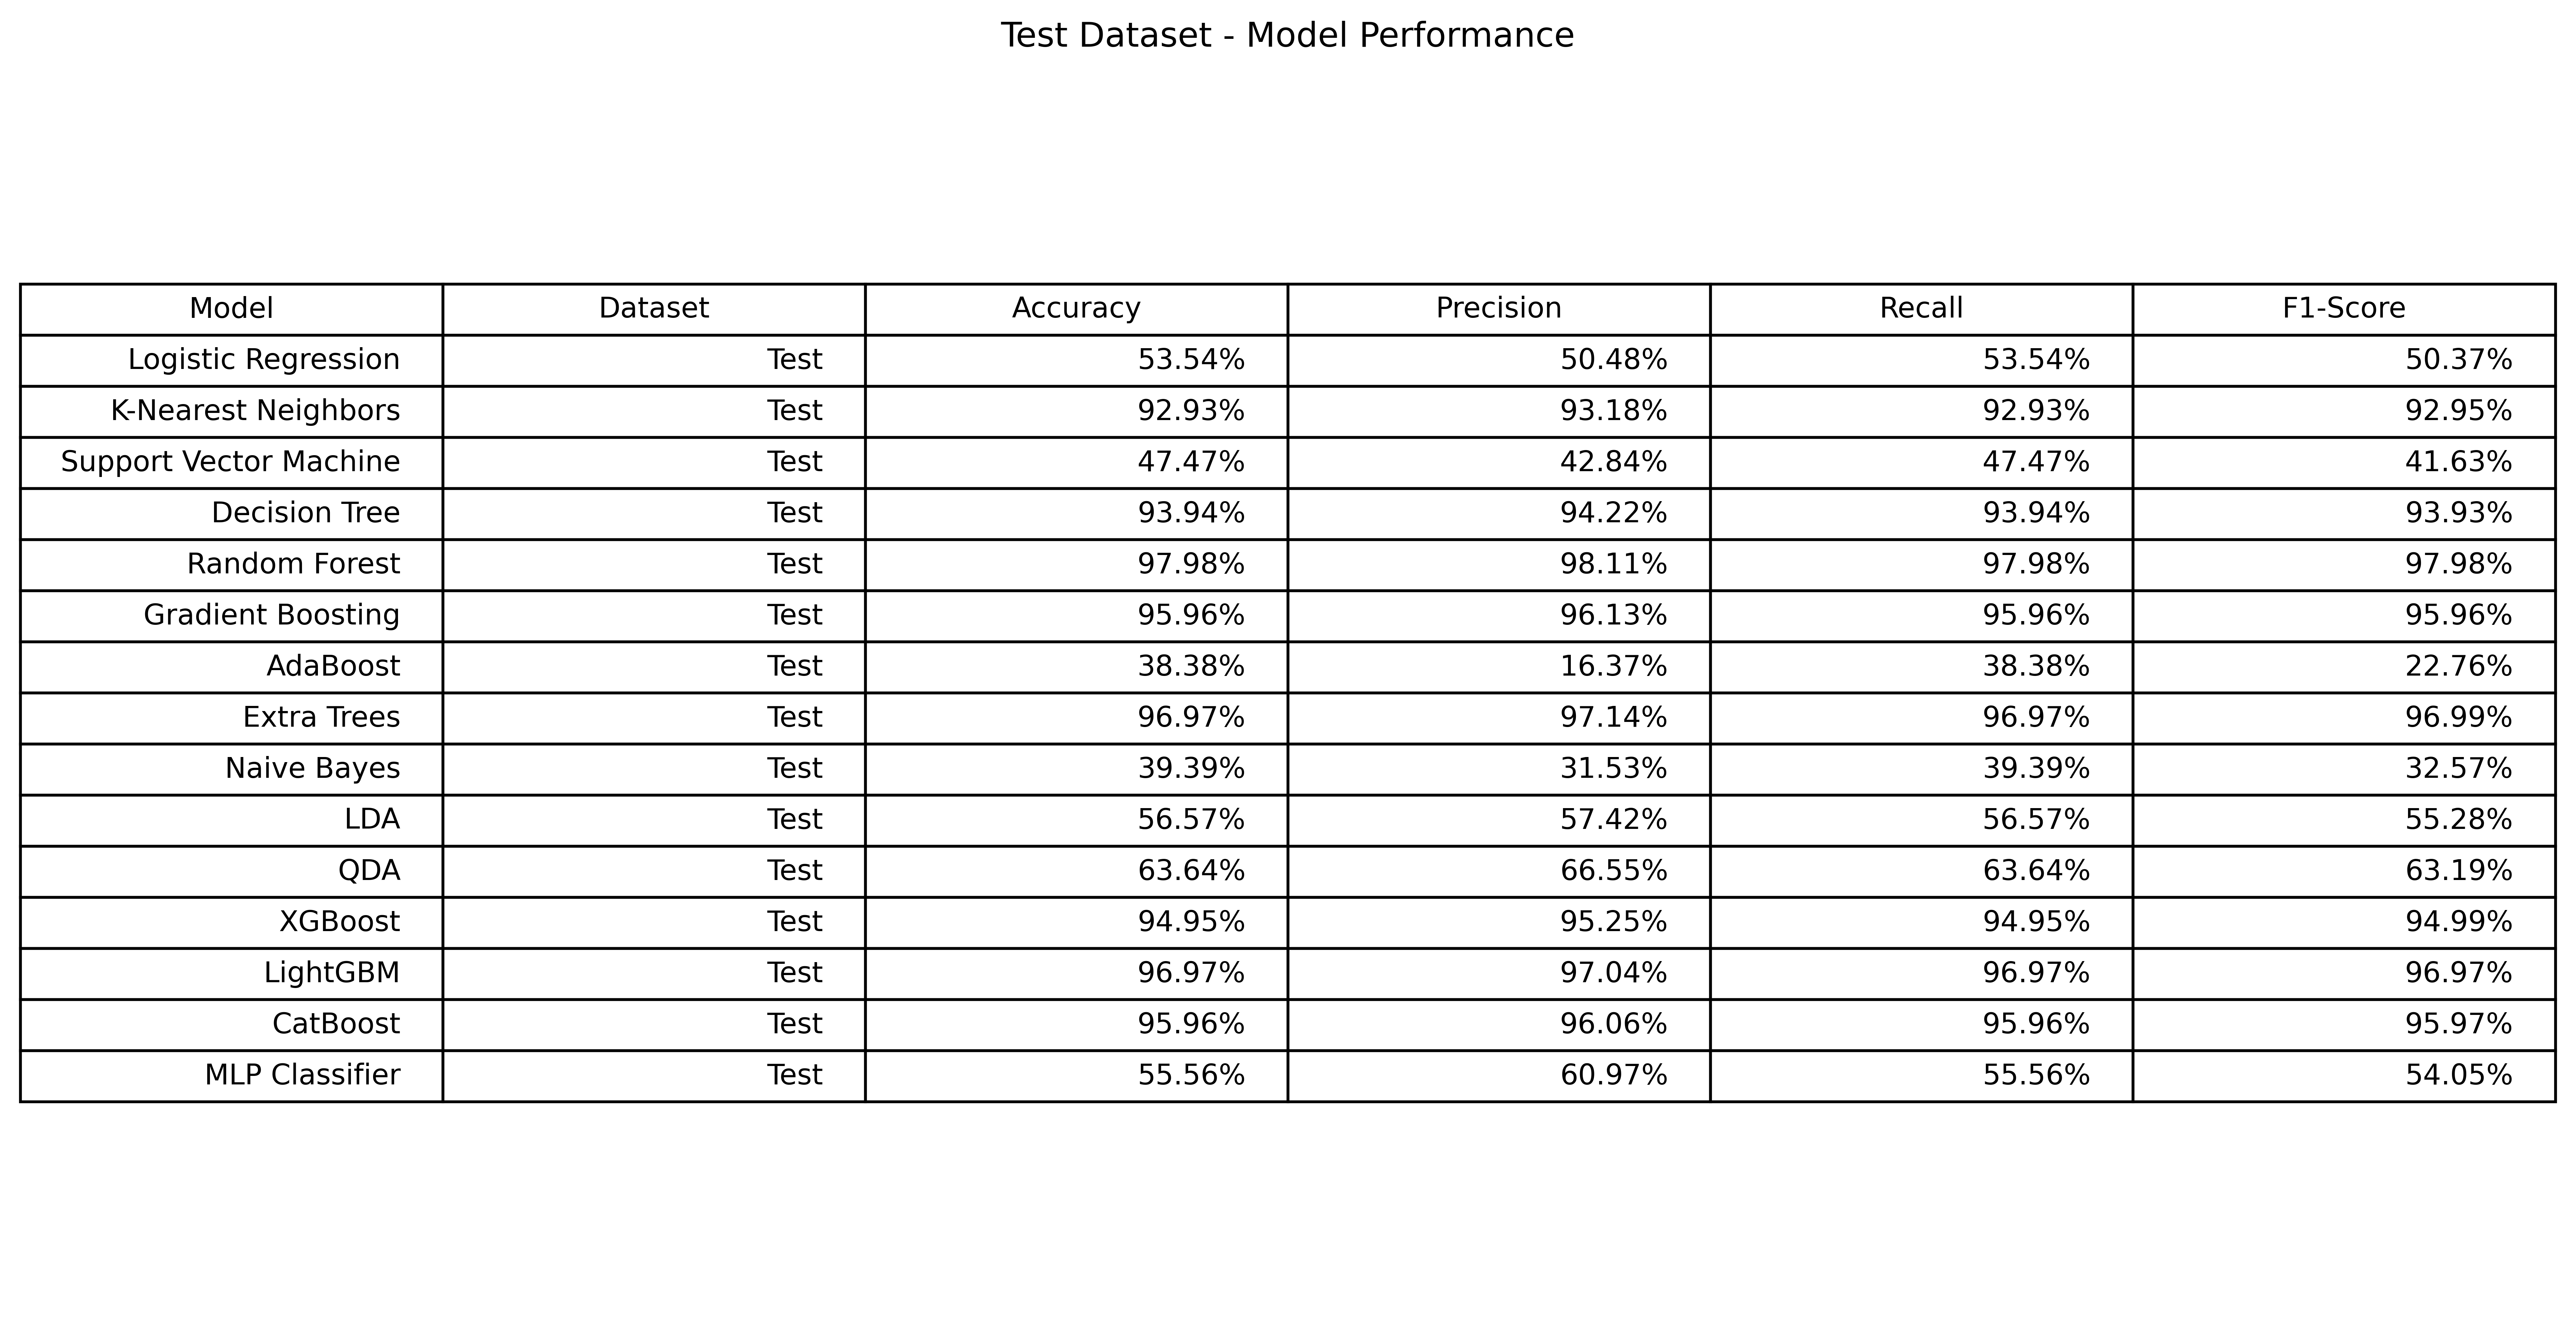

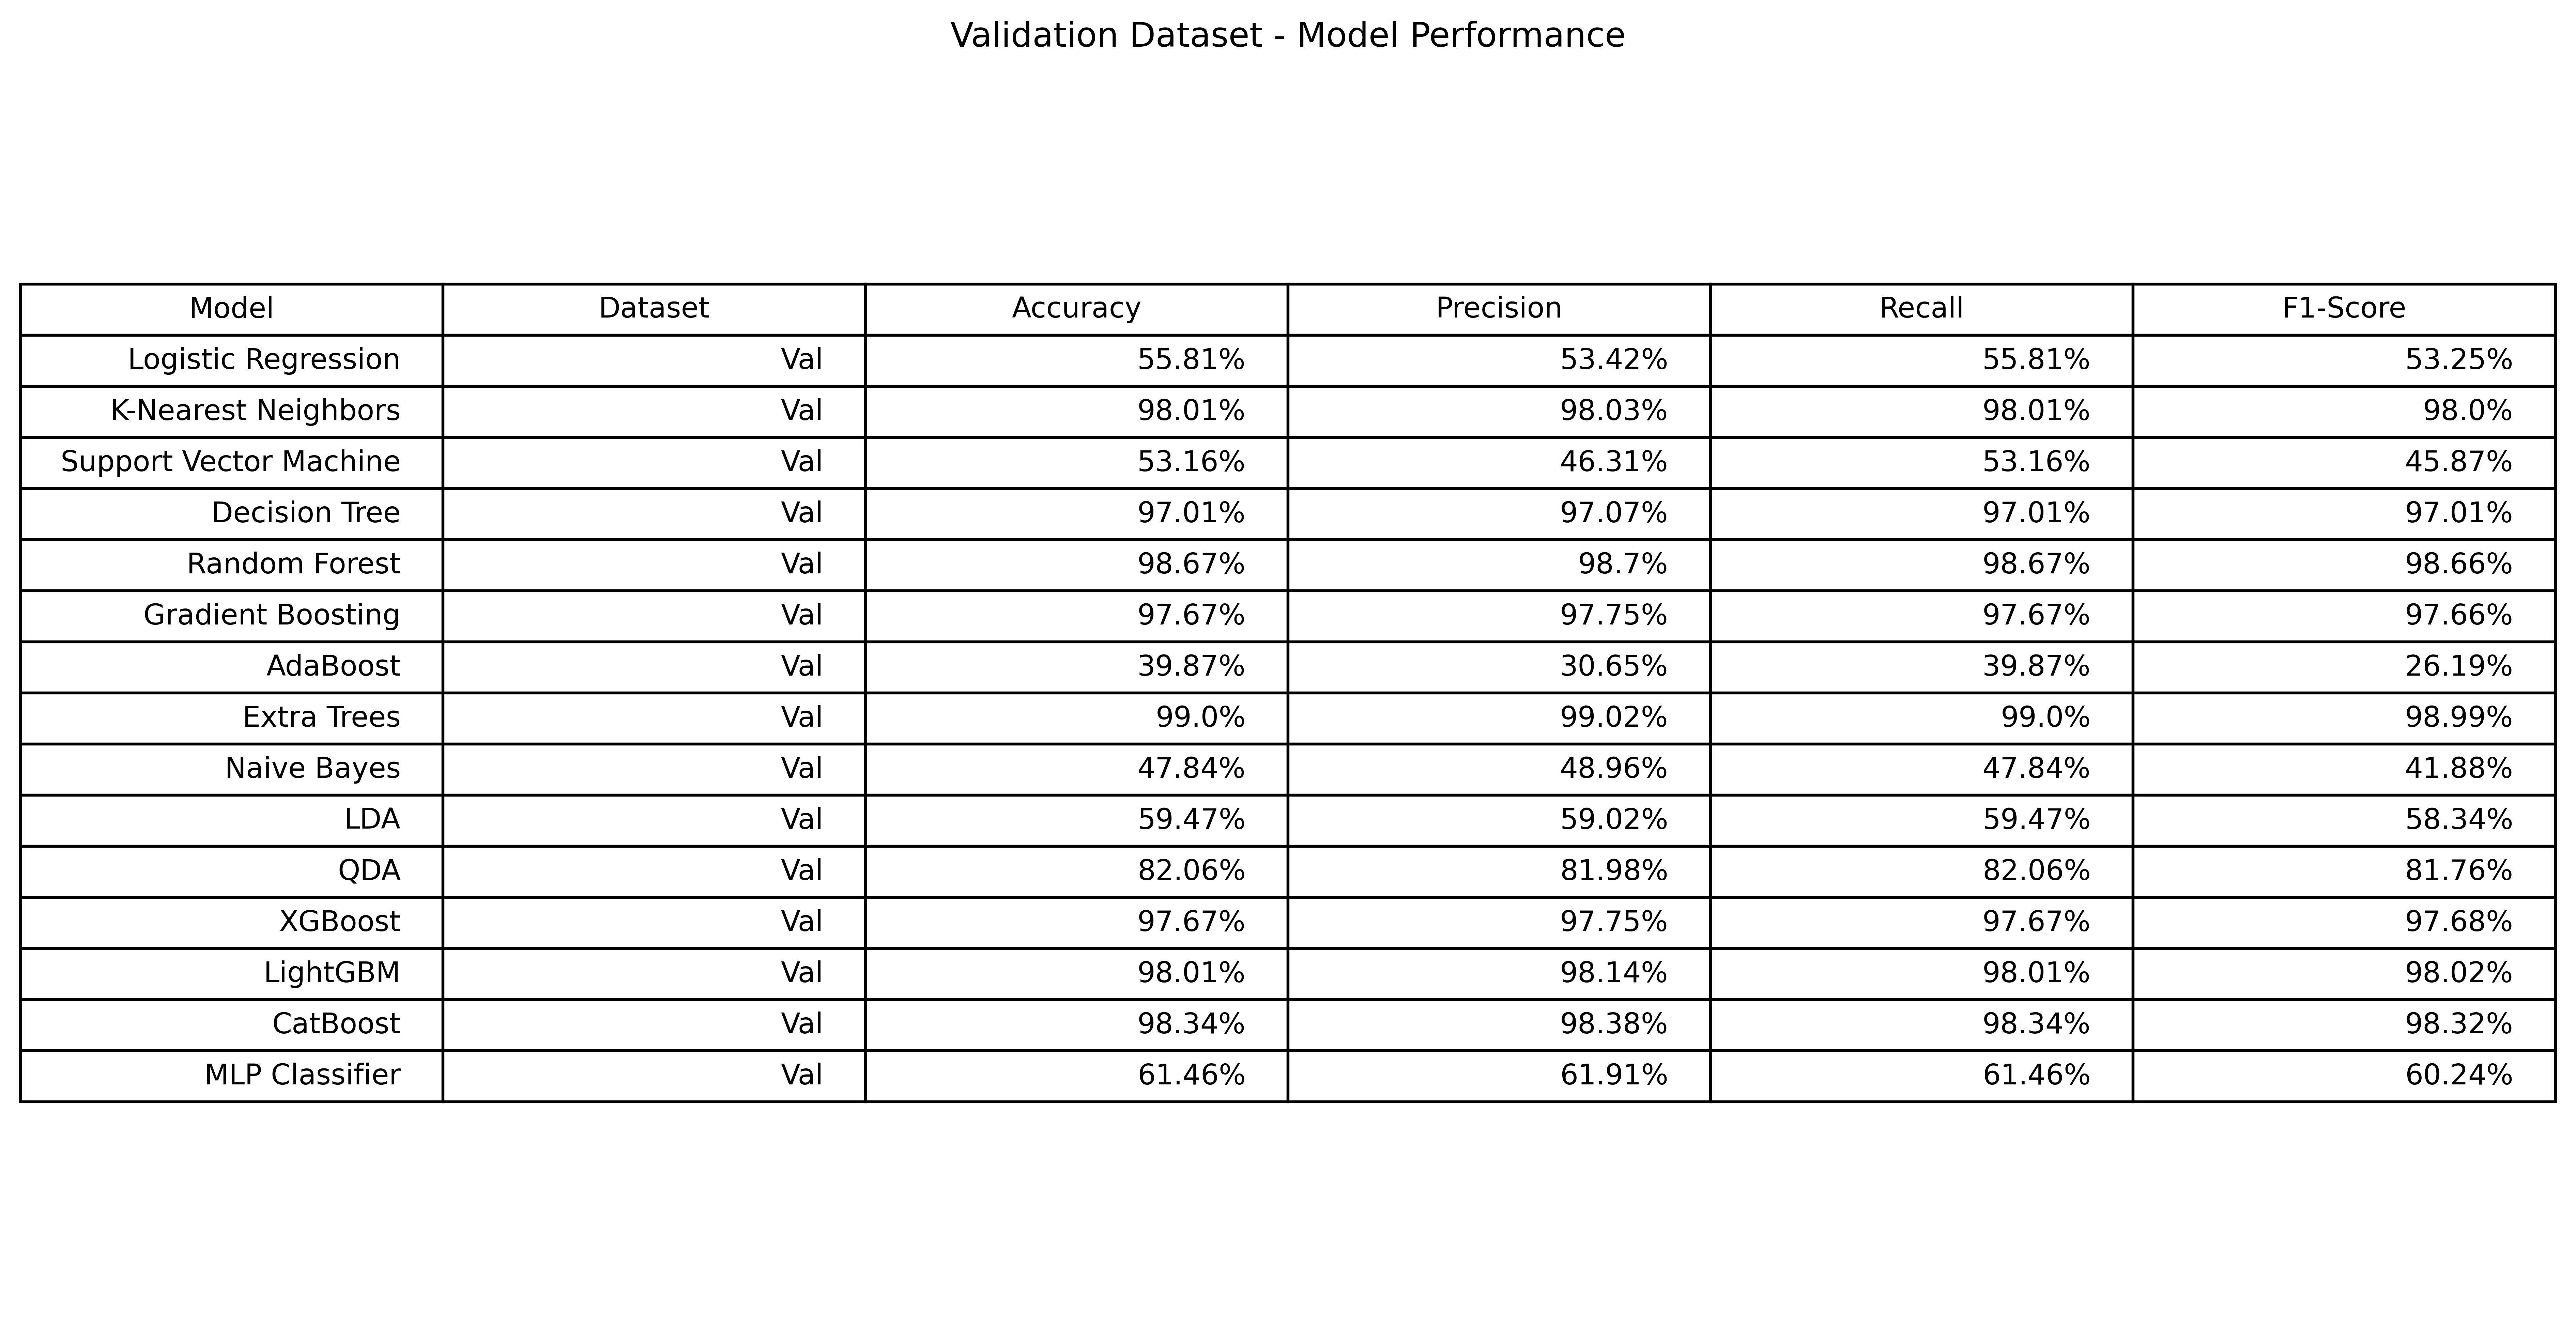

In [315]:
# Result percentage plots

save_dir = '/content/drive/MyDrive/Dataset/model_comparison_tables'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save results_df_test to a table image
plt.figure(figsize=(16, 8), dpi=600)
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=results_df_test.values, colLabels=results_df_test.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('Test Dataset - Model Performance')
plt.savefig(os.path.join(save_dir, 'test_dataset_model_performance.png'))
plt.show()

# Save results_df_val to a table image
plt.figure(figsize=(16, 8), dpi=600)
ax = plt.gca()
ax.axis('off')
table = plt.table(cellText=results_df_val.values, colLabels=results_df_val.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('Validation Dataset - Model Performance')
plt.savefig(os.path.join(save_dir, 'validation_dataset_model_performance.png'))
plt.show()
